## 우루사 VS 고덱스 분석하기
http://medinavi.co.kr/search_medicine.asp?keyword1=&keyword2=%EC%9A%B0%EB%A3%A8%EC%82%AC&keyword3=%EB%8C%80%EC%9B%85%EC%A0%9C%EC%95%BD

```
우루사정100밀리그램 246501ATB
우루사정200밀리그램 246502ATB
우루사정300밀리그램 246506ATB
우루사100mg연질캅셀 246501ACS
우루사캅셀200mg 246502ACH
우루사캡슐250밀리그램 246503ACH
고덱스캡슐 427800ACH
```


<img src="https://i.imgur.com/4dEl5Dl.jpg">

출처 : http://www.docdocdoc.co.kr/news/articleView.html?idxno=1053667

## 라이브러리로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 시각화를 위한 한글폰트 설정

In [2]:
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

In [3]:
from IPython.display import set_matplotlib_formats
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
set_matplotlib_formats('retina')

## 데이터셋 로드

In [4]:
df = pd.read_csv('data/medicine_ursa_godex_2011_2019.csv')
df.shape

(519525, 15)

## 데이터 미리보기

In [5]:
df.head(3)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2011,263152,301,3,1,12,41,20111109,246501ATB,1.0,3,3,111.0,999,20151220
1,2011,142227,310,4,1,14,41,20111125,246501ATB,1.0,3,7,111.0,2331,20151220
2,2011,253952,1013,1,2,9,46,20111203,246502ATB,1.0,3,14,165.0,6930,20151220


In [6]:
df.tail(3)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
519522,2019,999868,108375768,3,2,12,41,20190408,427800ACH,1.0,1,50,402.0,20100,20201222
519523,2019,999868,100117993,3,2,12,41,20191115,427800ACH,1.0,1,60,388.0,23280,20201222
519524,2019,999868,104284780,3,2,12,41,20190530,427800ACH,1.0,1,60,402.0,24120,20201222


## 데이터 전처리

### 주성분코드로 약품명 찾기
* 우루사정100밀리그램 246501ATB
* 우루사정200밀리그램 246502ATB
* 우루사정300밀리그램 246506ATB
* 우루사100mg연질캅셀 246501ACS
* 우루사캅셀200mg 246502ACH
* 우루사캡슐250밀리그램 246503ACH
* 고덱스캡슐 427800ACH

In [7]:
code = """우루사정100밀리그램 246501ATB
우루사정200밀리그램 246502ATB
우루사정300밀리그램 246506ATB
우루사100mg연질캅셀 246501ACS
우루사캅셀200mg 246502ACH
우루사캡슐250밀리그램 246503ACH
고덱스캡슐 427800ACH"""
code

'우루사정100밀리그램 246501ATB\n우루사정200밀리그램 246502ATB\n우루사정300밀리그램 246506ATB\n우루사100mg연질캅셀 246501ACS\n우루사캅셀200mg 246502ACH\n우루사캡슐250밀리그램 246503ACH\n고덱스캡슐 427800ACH'

In [8]:
code.split("\n")

['우루사정100밀리그램 246501ATB',
 '우루사정200밀리그램 246502ATB',
 '우루사정300밀리그램 246506ATB',
 '우루사100mg연질캅셀 246501ACS',
 '우루사캅셀200mg 246502ACH',
 '우루사캡슐250밀리그램 246503ACH',
 '고덱스캡슐 427800ACH']

In [14]:
# 위에서 만든 텍스트로 주성분코드와 약품명을 매치하기 위해 딕셔너리를 만듭니다.
# code_key_val 이라는 변수에 딕셔너리 형태로 값을 넣어줍니다.
codes = code.split("\n")
code_key_val = {}
for cname in codes:
    cname = cname.split(" ")
    key = cname[1]
    val = cname[0]
    code_key_val[key] = val

print(code_key_val)

{'246501ATB': '우루사정100밀리그램', '246502ATB': '우루사정200밀리그램', '246506ATB': '우루사정300밀리그램', '246501ACS': '우루사100mg연질캅셀', '246502ACH': '우루사캅셀200mg', '246503ACH': '우루사캡슐250밀리그램', '427800ACH': '고덱스캡슐'}


In [19]:
# 딕셔너리를 매핑합니다.
df["약품일반성분명"] = df["약품일반성분명코드"].map(code_key_val)

df[["약품일반성분명코드", "약품일반성분명"]].head()

,약품일반성분명코드,약품일반성분명
0,246501ATB,우루사정100밀리그램
1,246501ATB,우루사정100밀리그램
2,246502ATB,우루사정200밀리그램
3,246502ATB,우루사정200밀리그램
4,246501ATB,우루사정100밀리그램


### 우루사와 고덱스 구분하기

In [22]:
# 우루사는 "약품일반성분명코드"가 여러 개 입니다.
# 고덱스코드를 통해 우루사인지 아닌지 True, False로 boolean 값을 갖는 컬럼을 생성합니다.
# 컬럼명은 "우루사"로 합니다.
df["우루사"] = df["약품일반성분명코드"] != '427800ACH'
df[["약품일반성분명코드", "약품일반성분명", "우루사"]].head()

,약품일반성분명코드,약품일반성분명,우루사
0,246501ATB,우루사정100밀리그램,True
1,246501ATB,우루사정100밀리그램,True
2,246502ATB,우루사정200밀리그램,True
3,246502ATB,우루사정200밀리그램,True
4,246501ATB,우루사정100밀리그램,True


### 결측치 보기

In [23]:
# 결측치가 있는지 봅니다.
df.isnull().sum()

기준년도           0
가입자 일련번호       0
처방내역일련번호       0
일련번호           0
성별코드           0
연령대코드(5세단위)    0
시도코드           0
요양개시일자         0
약품일반성분명코드      0
1회 투약량         0
1일투약량          0
총투여일수          0
단가             0
금액             0
데이터 공개일자       0
약품일반성분명        0
우루사            0
dtype: int64

### 요양개시일자로 정렬하기

In [27]:
# "요양개시일자", "가입자 일련번호", "처방내역일련번호", "일련번호" 로 정렬합니다.
df = df.sort_values(
    ["요양개시일자", "가입자 일련번호", "처방내역일련번호", "일련번호"])
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,약품일반성분명,우루사
10179,2011,117350,2147682,1,1,14,41,20110101,427800ACH,1.0,2,15,434.0,13020,20151220,고덱스캡슐,False
10180,2011,117350,2147682,4,1,14,41,20110101,427800ACH,2.0,2,20,434.0,34720,20151220,고덱스캡슐,False
5743,2011,194408,1269590,1,1,14,47,20110101,246501ATB,1.0,2,30,111.0,6660,20151220,우루사정100밀리그램,True
4471,2011,197643,1083278,3,1,15,47,20110101,246502ATB,1.0,2,30,264.0,15840,20151220,우루사정200밀리그램,True
3389,2011,208640,824196,3,1,10,48,20110101,246502ATB,1.0,3,30,264.0,23760,20151220,우루사정200밀리그램,True


### 날짜 다루기
* 연, 월, 일, 요일 추출하기

In [28]:
# "요양개시일자"의 데이터 타입을 봅니다.
df["요양개시일자"].head(1)

10179    20110101
Name: 요양개시일자, dtype: int64

In [29]:
# "요양개시일자"를 datetime 형태로 변환하기 위해서 astype 을 사용해 문자형태로 변환합니다.
# 타입을 변경하고 다시 같은 컬럼에 데이터를 담아주어야 변경된 내용이 반영됩니다.
df["요양개시일자"] = pd.to_datetime(df["요양개시일자"].astype(str))

In [30]:
# "요양개시일자"에서 연, 월, 일을 추출합니다.
df["연"] = df["요양개시일자"].dt.year
df["월"] = df["요양개시일자"].dt.month
df["일"] = df["요양개시일자"].dt.day

In [33]:
# "요양개시일자"에서 "요일"과 "영문요일"을 추출합니다.
df["요일"] = df["요양개시일자"].dt.weekday
df["영문요일"] = df["요양개시일자"].dt.day_name()

In [34]:
# 요일을 한글요일로 변경합니다.
weekday = "월화수목금토일"

df["요일명"] = df["요일"].map(lambda x : weekday[x])

df[["요일", "영문요일", "요일명"]].head()

,요일,영문요일,요일명
10179,5,Saturday,토
10180,5,Saturday,토
5743,5,Saturday,토
4471,5,Saturday,토
3389,5,Saturday,토


### 컬럼 디스플레이 옵션 변경하기

In [35]:
# 컬럼이 많이 늘어나서 한번에 모든 컬럼이 보이지 않습니다.
# max_columns 의 수를 지정합니다.
pd.options.display.max_columns = None

In [36]:
# sample 을 통해 모든 컬럼이 보이는지 확인합니다.
df.sample()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,약품일반성분명,우루사,연,월,일,요일,영문요일,요일명
492734,2019,722801,107327911,10,1,8,41,2019-11-08,246501ATB,1.0,2,30,90.0,5400,20201222,우루사정100밀리그램,True,2019,11,8,4,Friday,금


### 시도코드를 시도명으로 변환하기
* 시도코드를 통해 시도명을 만듭니다.

In [37]:
city = """11 서울특별시
42 강원도
26 부산광역시
43 충청북도
27 대구광역시
44 충청남도
28 인천광역시
45 전라북도
29 광주광역시
46 전라남도
30 대전광역시
47 경상북도
31 울산광역시
48 경상남도
36 세종특별자치시
49 제주특별자치도
41 경기도"""

* 다음과 같은 형태가 되도록 딕셔너리 형태로 변환합니다.
```
{11: '서울특별시', 42: '강원도', 26: '부산광역시', 43: '충청북도', 27: '대구광역시', 44: '충청남도', 28: '인천광역시', 45: '전라북도', 29: '광주광역시', 46: '전라남도', 30: '대전광역시', 47: '경상북도', 31: '울산광역시', 48: '경상남도', 36: '세종특별자치시', 49: '제주특별자치도', 41: '경기도'}
```

In [38]:
city.split("\n")

['11 서울특별시',
 '42 강원도',
 '26 부산광역시',
 '43 충청북도',
 '27 대구광역시',
 '44 충청남도',
 '28 인천광역시',
 '45 전라북도',
 '29 광주광역시',
 '46 전라남도',
 '30 대전광역시',
 '47 경상북도',
 '31 울산광역시',
 '48 경상남도',
 '36 세종특별자치시',
 '49 제주특별자치도',
 '41 경기도']

In [41]:
city_list = city.split("\n")
city_name = {}
for city_info in city_list:
    first = int(city_info.split(' ')[0])
    last = city_info.split(' ')[1]
    city_name[first] = last
    
print(city_name)

{11: '서울특별시', 42: '강원도', 26: '부산광역시', 43: '충청북도', 27: '대구광역시', 44: '충청남도', 28: '인천광역시', 45: '전라북도', 29: '광주광역시', 46: '전라남도', 30: '대전광역시', 47: '경상북도', 31: '울산광역시', 48: '경상남도', 36: '세종특별자치시', 49: '제주특별자치도', 41: '경기도'}


In [42]:
df["시도명"] = df["시도코드"].map(city_name)
df[["시도명", "시도코드"]].head()

,시도명,시도코드
10179,경기도,41
10180,경기도,41
5743,경상북도,47
4471,경상북도,47
3389,경상남도,48


### 연령대코드(5세단위)

In [46]:
# '연령대코드(5세단위)' 를 연령대로 나타내기
age_code = """1 00~04세 
2 05~09세
3 10~14세
4 15~19세
5 20~24세
6 25~29세
7 30~34세
8 35~39세
9 40~44세
10 45~49세
11 50~54세
12 55~59세
13 60~64세
14 65~69세
15 70~74세
16 75~79세
17 80~84세
18 85세+"""

In [49]:
age_list = age_code.split("\n")
age_dict = {}
for age_pair in age_list:
    first = int(age_pair.split(' ')[0])
    last = age_pair.split(' ')[1]
    age_dict[first] = last

In [50]:
age_dict

{1: '00~04세',
 2: '05~09세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [51]:
df["연령대"] = df["연령대코드(5세단위)"].map(age_dict)

df[["연령대", "연령대코드(5세단위)"]].head()

,연령대,연령대코드(5세단위)
10179,65~69세,14
10180,65~69세,14
5743,65~69세,14
4471,70~74세,15
3389,45~49세,10


### 천단위 쉼표 만들기

In [59]:
# 천단위 숫자에 구분문자를 넣어주는 함수
# 문자열(str)타입이면 받은 값을 그대로 반환하고 숫자이면 천단위로 ,를 찍어 반환합니다.
def format_number(x):
    if type(x) == str:
        return x
    else:
        return f"{x:,.0f}"  # 소수점 아래는 출력되지 않음
    
format_number(123456)

'123,456'

## 데이터 요약하기

In [56]:
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,약품일반성분명,우루사,연,월,일,요일,영문요일,요일명,시도명,연령대
10179,2011,117350,2147682,1,1,14,41,2011-01-01,427800ACH,1.0,2,15,434.0,13020,20151220,고덱스캡슐,False,2011,1,1,5,Saturday,토,경기도,65~69세
10180,2011,117350,2147682,4,1,14,41,2011-01-01,427800ACH,2.0,2,20,434.0,34720,20151220,고덱스캡슐,False,2011,1,1,5,Saturday,토,경기도,65~69세
5743,2011,194408,1269590,1,1,14,47,2011-01-01,246501ATB,1.0,2,30,111.0,6660,20151220,우루사정100밀리그램,True,2011,1,1,5,Saturday,토,경상북도,65~69세
4471,2011,197643,1083278,3,1,15,47,2011-01-01,246502ATB,1.0,2,30,264.0,15840,20151220,우루사정200밀리그램,True,2011,1,1,5,Saturday,토,경상북도,70~74세
3389,2011,208640,824196,3,1,10,48,2011-01-01,246502ATB,1.0,3,30,264.0,23760,20151220,우루사정200밀리그램,True,2011,1,1,5,Saturday,토,경상남도,45~49세


In [54]:
df.describe()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,연,월,일,요일
count,519525.000000,5.195250e+05,5.195250e+05,519525.000000,519525.000000,519525.000000,519525.000000,519525.000000,519525.000000,519525.000000,519525.000000,519525.000000,5.195250e+05,519525.000000,519525.000000,519525.000000,519525.000000
mean,2015.867829,4.781701e+05,3.447093e+07,2.753490,1.326011,11.868316,34.402117,1.100890,2.211482,36.666771,212.941246,19061.941708,2.017508e+07,2015.867829,6.636185,15.926081,2.246689
std,2.547403,2.841584e+05,3.780693e+07,2.084571,0.468752,2.736498,12.273835,0.340787,0.689301,28.045391,131.529555,24837.303554,1.831436e+04,2.547403,3.471578,8.723040,1.656215
min,2011.000000,1.500000e+01,2.100000e+01,1.000000,1.000000,1.000000,11.000000,0.000100,1.000000,0.000000,0.000000,0.000000,2.015122e+07,2011.000000,1.000000,1.000000,0.000000
25%,2014.000000,2.240890e+05,4.650294e+06,1.000000,1.000000,10.000000,26.000000,1.000000,2.000000,25.000000,91.000000,5400.000000,2.016122e+07,2014.000000,4.000000,8.000000,1.000000
50%,2016.000000,4.739750e+05,1.589261e+07,2.000000,1.000000,12.000000,41.000000,1.000000,2.000000,30.000000,181.000000,10860.000000,2.017122e+07,2016.000000,7.000000,16.000000,2.000000
75%,2018.000000,7.232570e+05,5.369796e+07,4.000000,2.000000,14.000000,45.000000,1.000000,3.000000,40.000000,388.000000,24120.000000,2.019122e+07,2018.000000,10.000000,23.000000,4.000000
max,2019.000000,1.038117e+06,1.101284e+08,39.000000,2.000000,18.000000,49.000000,100.000000,7.000000,392.000000,434.000000,623520.000000,2.020122e+07,2019.000000,12.000000,31.000000,6.000000


In [55]:
df.describe(include="object")

,약품일반성분명코드,약품일반성분명,영문요일,요일명,시도명,연령대
count,519525,519525,519525,519525,519525,519525
unique,5,5,7,7,17,18
top,246501ATB,우루사정100밀리그램,Monday,월,경기도,55~59세
freq,202552,202552,105597,105597,113023,82565


## 사분위수 시각화

In [60]:
# groupby와 describe를 사용하여 약품일반성분명에 따른 총투여일수의 기술통계 값을 구합니다.
df.groupby(["약품일반성분명"])["총투여일수"].describe()

,count,mean,std,min,25%,50%,75%,max
약품일반성분명,,,,,,,,
고덱스캡슐,137908.0,35.254198,25.399938,1.0,21.0,30.0,35.0,360.0
우루사정100밀리그램,202552.0,35.665321,26.263389,1.0,21.0,30.0,35.0,360.0
우루사정200밀리그램,175102.0,38.632923,31.258076,0.0,28.0,30.0,50.0,392.0
우루사정300밀리그램,3948.0,50.238855,42.029589,1.0,30.0,30.0,60.0,365.0
우루사캡슐250밀리그램,15.0,22.733333,8.327808,7.0,14.5,28.0,30.0,30.0


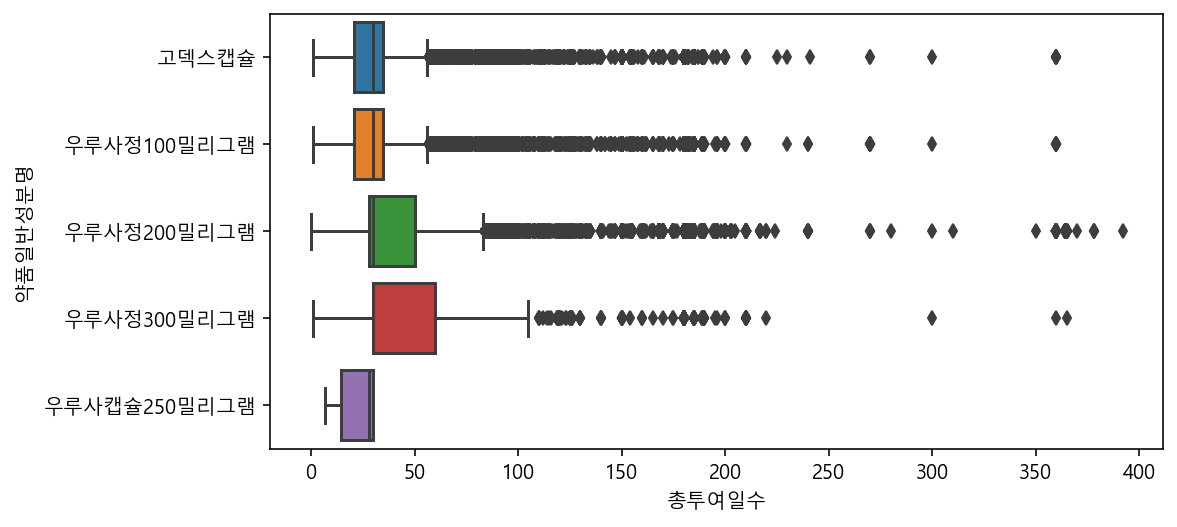

In [63]:
# boxplot을 통해 위에서 약품일반성분명에 따른 총투여일수의 기술통계 값을 시각화 합니다.
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='총투여일수', y='약품일반성분명')

In [64]:
# groupby와 describe를 사용하여 약품일반성분명에 따른 금액 기술통계 값을 구합니다.
df.groupby(["약품일반성분명"])["금액"].describe()

,count,mean,std,min,25%,50%,75%,max
약품일반성분명,,,,,,,,
고덱스캡슐,137908.0,39161.117774,35512.880837,0.0,18186.0,25980.0,49560.0,623520.0
우루사정100밀리그램,202552.0,7450.513483,6809.928224,0.0,3330.0,5460.0,8190.0,179820.0
우루사정200밀리그램,175102.0,16432.393708,16606.364051,0.0,7380.0,10920.0,18200.0,390960.0
우루사정300밀리그램,3948.0,29360.560284,32750.752463,548.0,8220.0,16440.0,32880.0,304140.0
우루사캡슐250밀리그램,15.0,9795.600000,4455.532176,4158.0,6840.0,8316.0,13446.0,16632.0


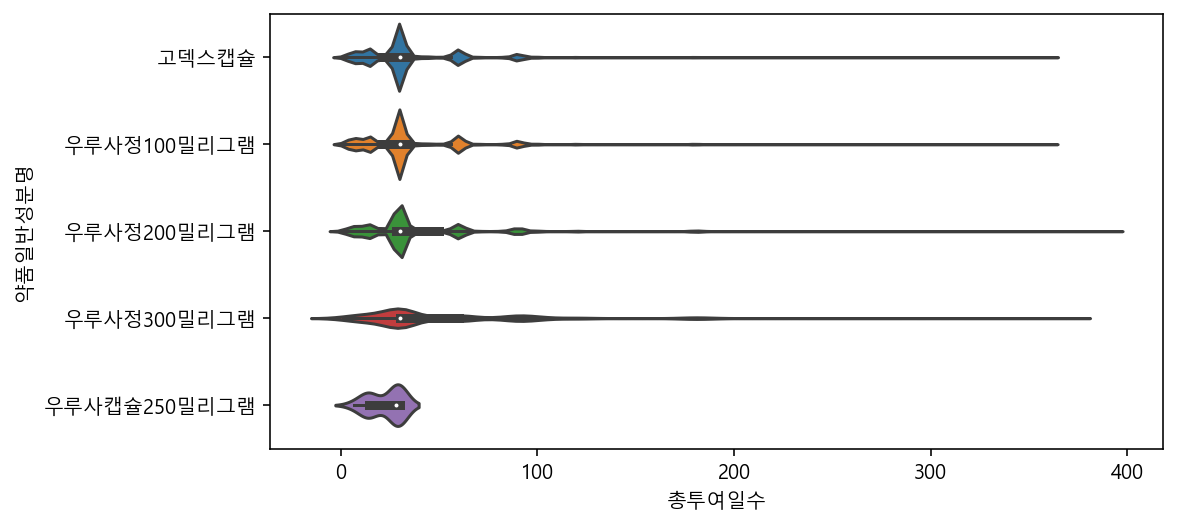

In [66]:
# violinplot을 통해 위에서 약품일반성분명에 따른 금액의 기술통계 값을 시각화 합니다.
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='총투여일수', y='약품일반성분명')

## 연도별 처방 수

In [71]:
# 범주형 vs 범주형 값을 구할 때 crosstab 을 사용합니다.
# 연도별로 우루사와 고덱스의 처방수를 구합니다.
pd.crosstab(df['연'], df['우루사']).style.format(format_number)

우루사,False,True
연,,
2011,"6,939","28,773"
2012,"8,130","31,122"
2013,"8,507","34,153"
2014,"8,576","33,027"
2015,"10,886","35,125"
2016,"16,233","47,456"
2017,"21,078","52,073"
2018,"25,829","55,564"
2019,"31,730","64,324"


In [74]:
# 위에서 구한 값을 pivot_table 로 똑같이 구해봅니다.
# 연도별로 우루사와 고덱스의 처방수를 구합니다.
# aggfunc 에 len 을 사용하면 갯수를 카운트 합니다.
# "count"를 사용해도 됩니다.
year_ursa = pd.pivot_table(data=df, index=["연", "우루사"],  
               values="가입자 일련번호", aggfunc="count")
year_ursa.columns = ["처방수"]
year_ursa = year_ursa.reset_index()
year_ursa

,연,우루사,처방수
0,2011,False,6939
1,2011,True,28773
2,2012,False,8130
3,2012,True,31122
4,2013,False,8507
5,2013,True,34153
6,2014,False,8576
7,2014,True,33027
8,2015,False,10886
9,2015,True,35125


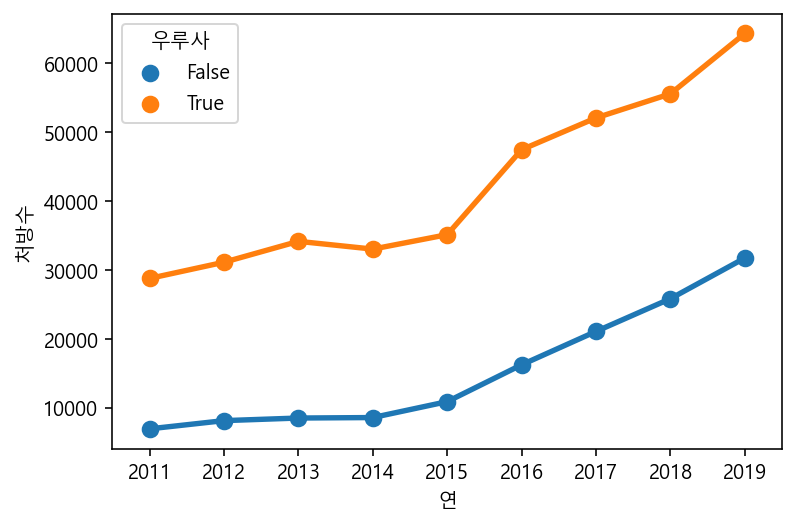

In [75]:
# 위에서 구한 값을 pointplot으로 시각화 합니다.
sns.pointplot(data=year_ursa, x="연", y="처방수", hue="우루사")

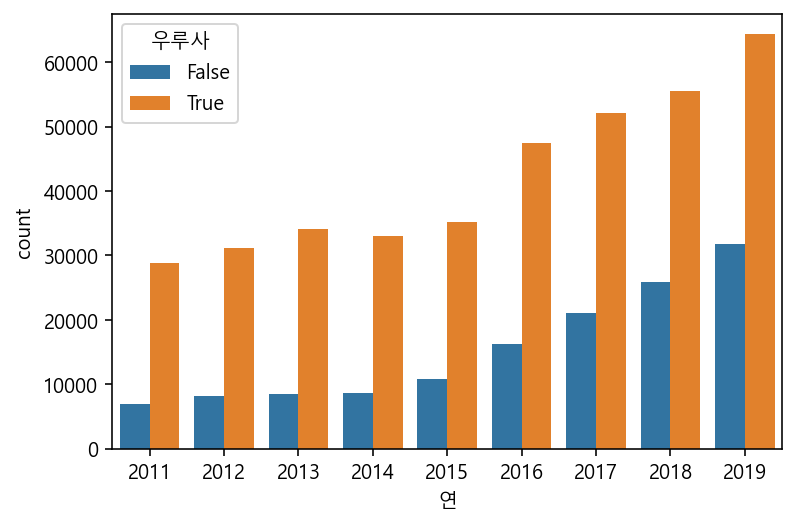

In [77]:
# countplot으로 시각화 합니다.
# x="연", hue="우루사"
sns.countplot(data=df, x='연', hue='우루사')

## 연도별 처방 금액

In [78]:
# pivot_table로 연도별 처방금액의 합계를 구합니다.
# index="연", values="금액", aggfunc="sum"
year_count_sum = pd.pivot_table(data=df, index="연", values="금액", 
                          aggfunc="sum")
year_count_sum["금액"].map(format_number)

연
2011      674,280,533
2012      694,458,901
2013      715,521,255
2014      693,872,946
2015      833,998,544
2016    1,213,907,296
2017    1,440,831,956
2018    1,659,969,643
2019    1,976,314,192
Name: 금액, dtype: object

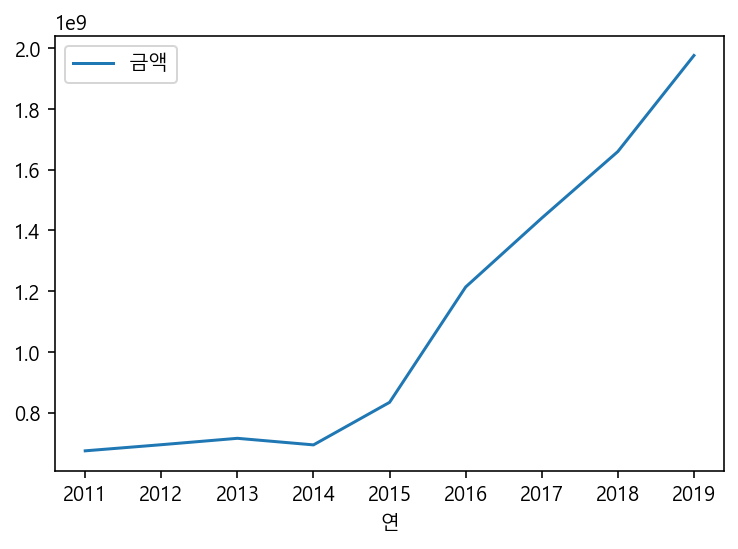

In [79]:
# 위에서 구한 값을 시각화 합니다.
year_count_sum.plot()

In [94]:
# pivot_table로 우루사 vs 고덱스의 연도별 처방 금액을 구합니다.
# index=["연", "우루사"], values="가입자 일련번호", aggfunc="sum"

year_ursa = pd.pivot_table(data=df, index=["연", "우루사"] ,values='금액', aggfunc='sum').reset_index()

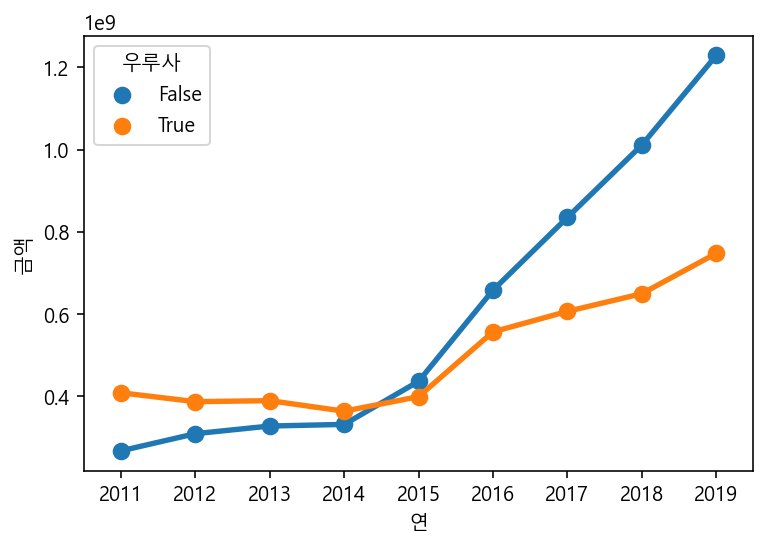

In [96]:
# 위에서 구한 값을 pointplot으로 시각화 합니다.
# 연도별 처방금액 합계를 위에서 구한 값으로 시각화 합니다.
sns.pointplot(data=year_ursa, x='연', y = '금액', hue='우루사')

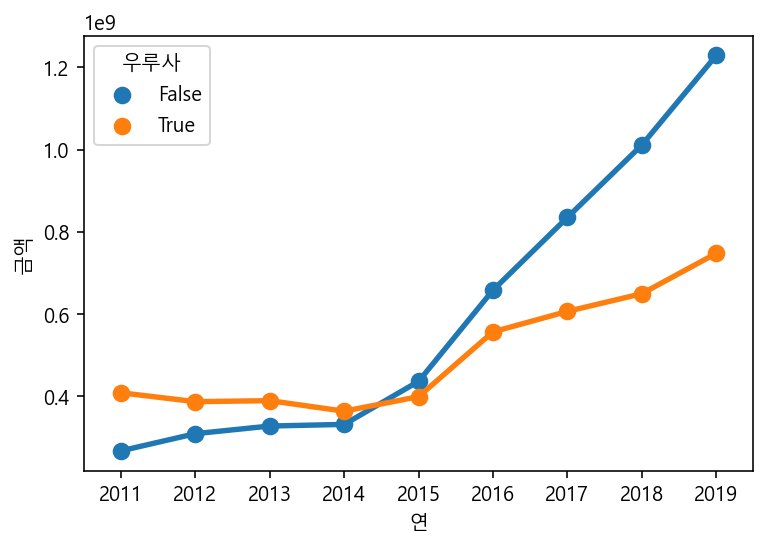

In [98]:
sns.pointplot(data=df, x='연', y='금액', hue='우루사', ci=None, estimator=np.sum)

### 시도별 처방수와 금액 구하기

In [101]:
# 다음의 옵션으로 pivot_table을 구합니다.
# index="연", columns = "시도명", values="가입자 일련번호", aggfunc="count
year_ursa = pd.pivot_table(data=df, index='연', columns='시도명', values='가입자 일련번호', aggfunc='count')

In [102]:
# 결측치를 채우고 int 타입으로 변경합니다.
year_city = year_ursa.fillna(0).astype('int')
year_city

시도명,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
연,,,,,,,,,,,,,,,,,
2011,830,7710,2472,1791,1364,1377,1000,3774,6076,0,732,2008,1756,2108,326,1585,803
2012,1004,8215,2902,1906,1792,1568,923,4264,5986,35,876,2021,2164,2507,351,1865,873
2013,1112,8780,3331,2342,1505,1625,1165,4754,6606,83,1003,2110,2388,2639,361,1960,896
2014,1123,8625,2951,2354,1485,1904,1085,4829,6027,72,767,2154,2209,2639,366,2030,983
2015,1226,9582,3642,2355,1631,1846,1262,5185,6852,155,895,2412,2433,2793,615,2097,1030
2016,1828,13762,4668,3372,2309,2376,1882,6625,9254,200,1281,3485,3375,4045,623,2938,1666
2017,1959,16079,5412,3419,2539,3199,2035,7614,10577,263,1466,3704,3918,4427,932,3469,2139
2018,2214,17841,5942,4775,2903,3450,2308,8115,11734,372,1331,4195,4142,5139,813,3859,2260
2019,2876,22429,7027,4942,3330,3582,2648,9316,14422,509,1445,5089,4524,5686,1059,4545,2625


### Pandas Style
[Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [103]:
# .style.format("{:,}").bar() 로 데이터프레임의 스타일을 설정합니다.
year_city.style.format("{:,}").bar()

시도명,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
연,,,,,,,,,,,,,,,,,
2011,830,"7,710","2,472","1,791","1,364","1,377","1,000","3,774","6,076",0,732,"2,008","1,756","2,108",326,"1,585",803
2012,"1,004","8,215","2,902","1,906","1,792","1,568",923,"4,264","5,986",35,876,"2,021","2,164","2,507",351,"1,865",873
2013,"1,112","8,780","3,331","2,342","1,505","1,625","1,165","4,754","6,606",83,"1,003","2,110","2,388","2,639",361,"1,960",896
2014,"1,123","8,625","2,951","2,354","1,485","1,904","1,085","4,829","6,027",72,767,"2,154","2,209","2,639",366,"2,030",983
2015,"1,226","9,582","3,642","2,355","1,631","1,846","1,262","5,185","6,852",155,895,"2,412","2,433","2,793",615,"2,097","1,030"
2016,"1,828","13,762","4,668","3,372","2,309","2,376","1,882","6,625","9,254",200,"1,281","3,485","3,375","4,045",623,"2,938","1,666"
2017,"1,959","16,079","5,412","3,419","2,539","3,199","2,035","7,614","10,577",263,"1,466","3,704","3,918","4,427",932,"3,469","2,139"
2018,"2,214","17,841","5,942","4,775","2,903","3,450","2,308","8,115","11,734",372,"1,331","4,195","4,142","5,139",813,"3,859","2,260"
2019,"2,876","22,429","7,027","4,942","3,330","3,582","2,648","9,316","14,422",509,"1,445","5,089","4,524","5,686","1,059","4,545","2,625"


In [104]:
# .style.format("{:,}").background_gradient() 로 스타일을 설정합니다.
year_city.style.format('{:,}').background_gradient()

시도명,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
연,,,,,,,,,,,,,,,,,
2011,830,"7,710","2,472","1,791","1,364","1,377","1,000","3,774","6,076",0,732,"2,008","1,756","2,108",326,"1,585",803
2012,"1,004","8,215","2,902","1,906","1,792","1,568",923,"4,264","5,986",35,876,"2,021","2,164","2,507",351,"1,865",873
2013,"1,112","8,780","3,331","2,342","1,505","1,625","1,165","4,754","6,606",83,"1,003","2,110","2,388","2,639",361,"1,960",896
2014,"1,123","8,625","2,951","2,354","1,485","1,904","1,085","4,829","6,027",72,767,"2,154","2,209","2,639",366,"2,030",983
2015,"1,226","9,582","3,642","2,355","1,631","1,846","1,262","5,185","6,852",155,895,"2,412","2,433","2,793",615,"2,097","1,030"
2016,"1,828","13,762","4,668","3,372","2,309","2,376","1,882","6,625","9,254",200,"1,281","3,485","3,375","4,045",623,"2,938","1,666"
2017,"1,959","16,079","5,412","3,419","2,539","3,199","2,035","7,614","10,577",263,"1,466","3,704","3,918","4,427",932,"3,469","2,139"
2018,"2,214","17,841","5,942","4,775","2,903","3,450","2,308","8,115","11,734",372,"1,331","4,195","4,142","5,139",813,"3,859","2,260"
2019,"2,876","22,429","7,027","4,942","3,330","3,582","2,648","9,316","14,422",509,"1,445","5,089","4,524","5,686","1,059","4,545","2,625"


### 시도별 서브플롯 그리기

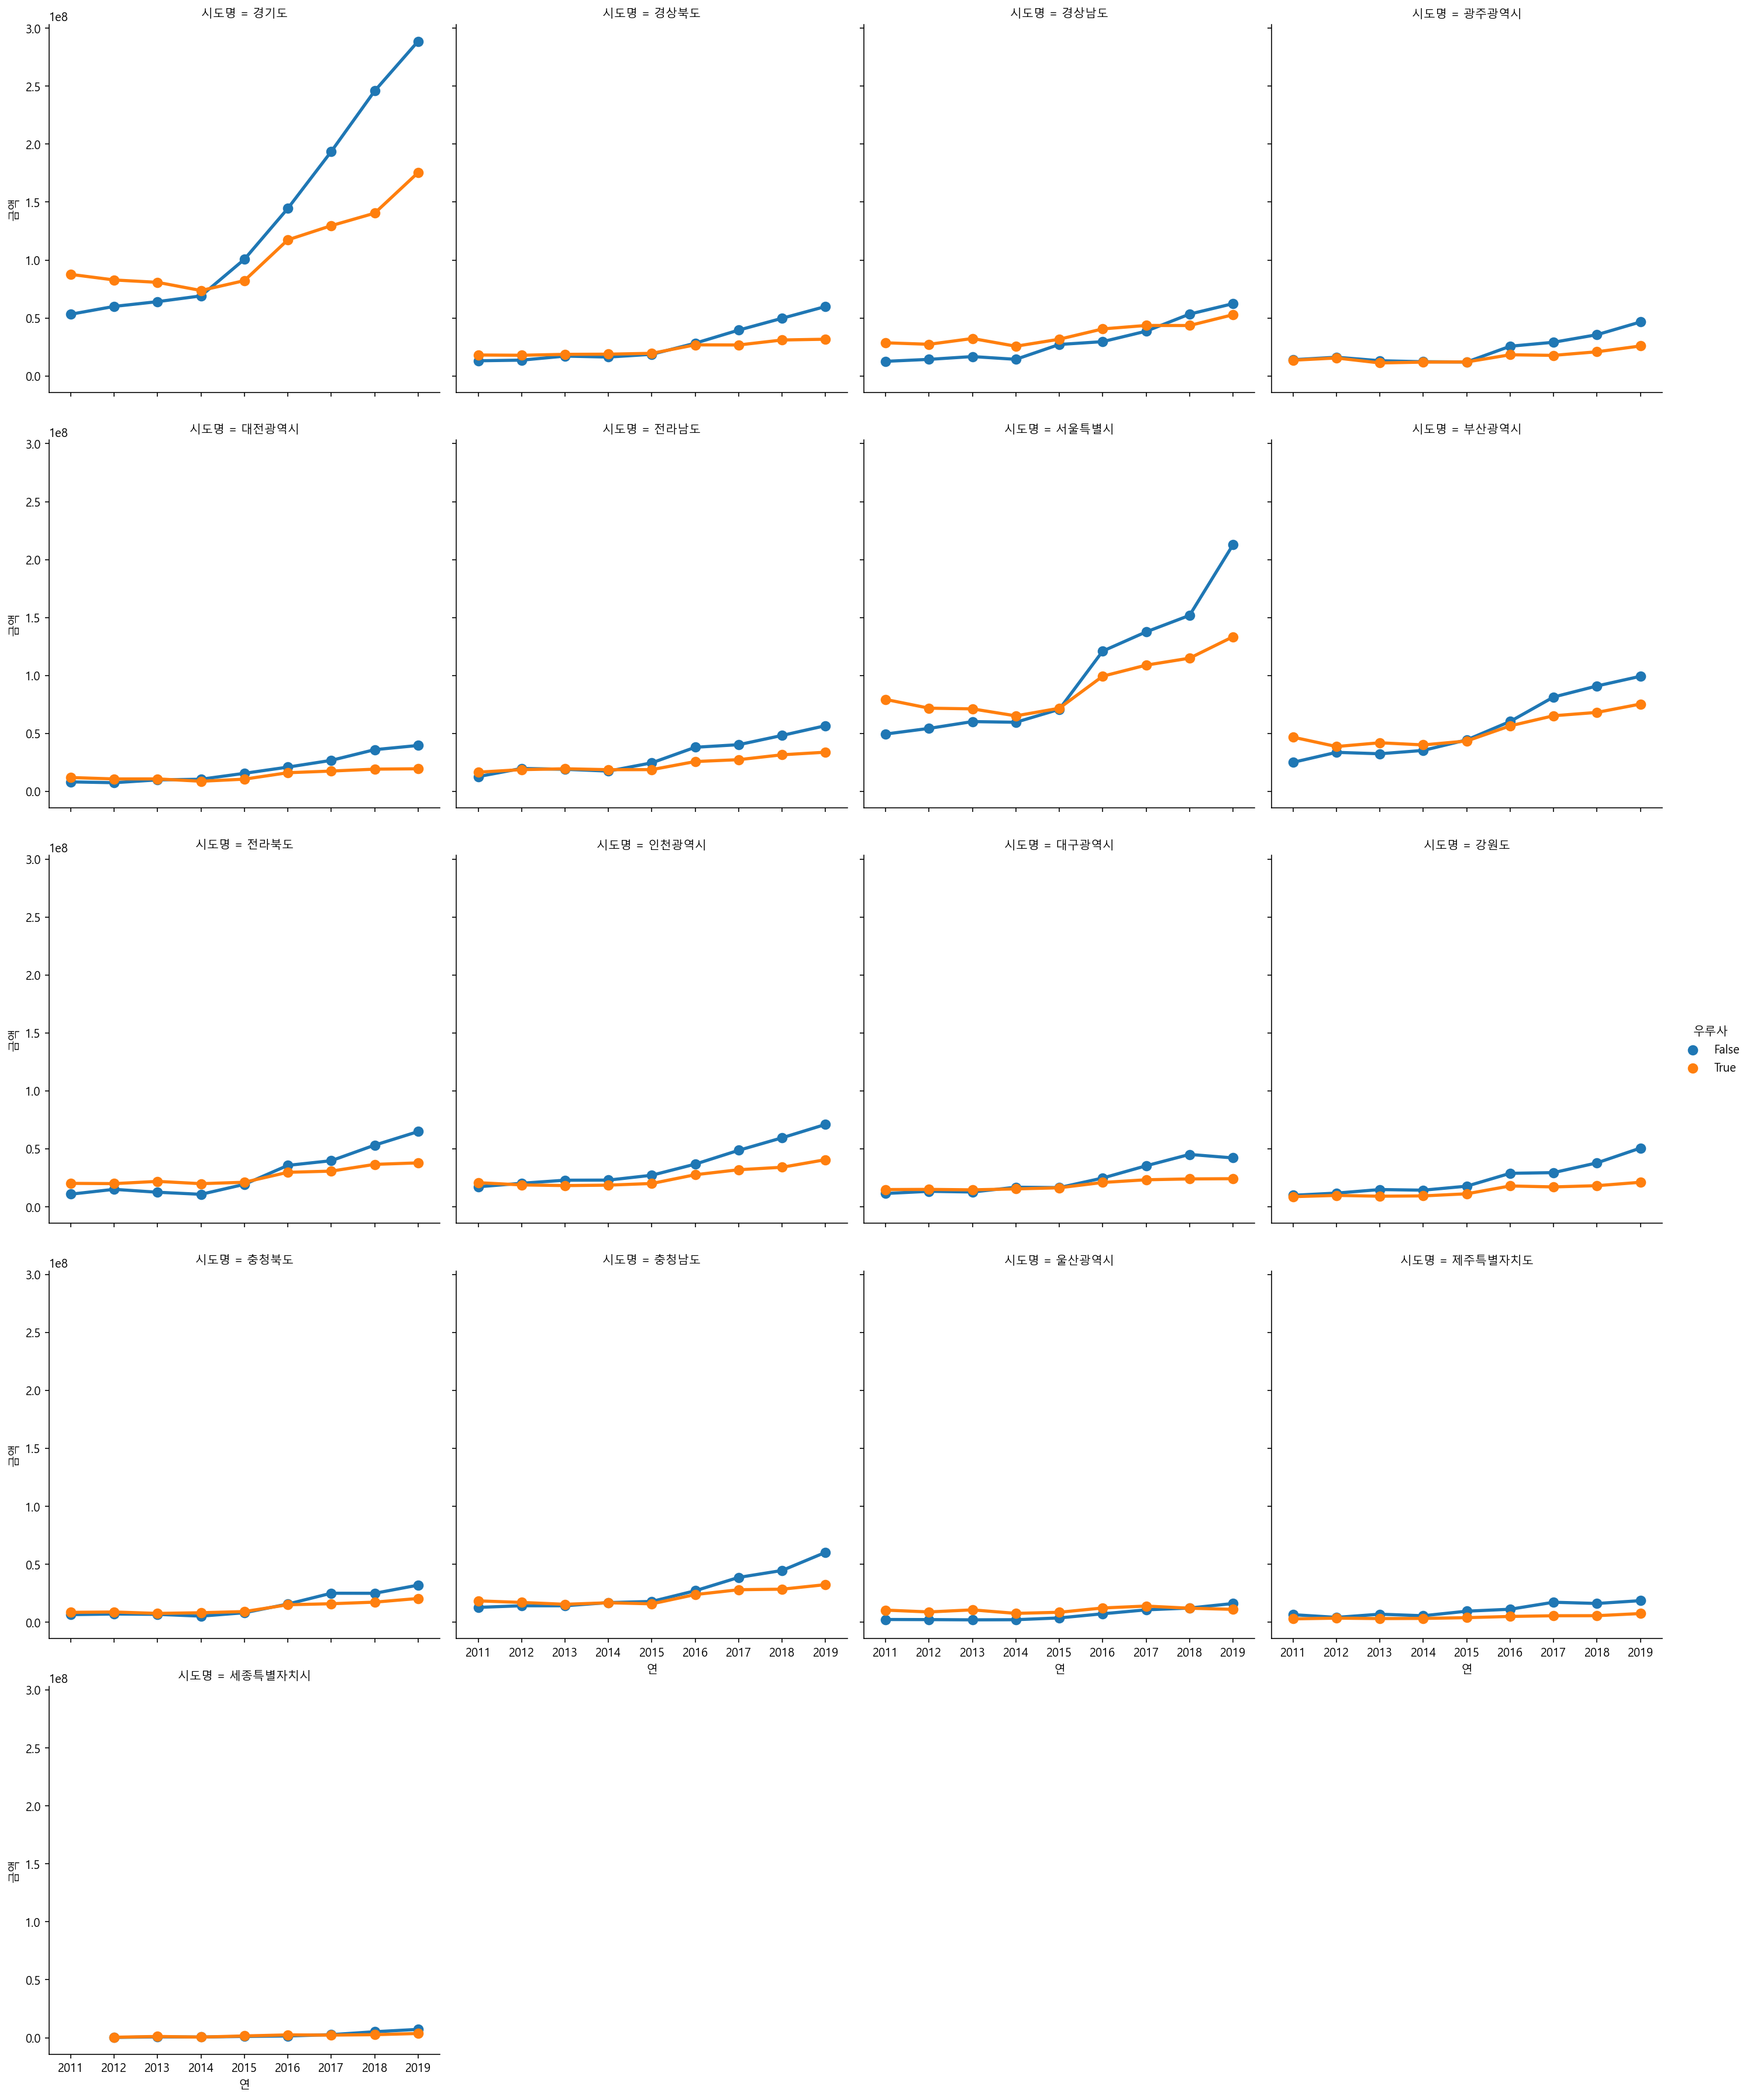

In [110]:
# catplot을 통해 연도별, 금액을 시도명으로 서브플롯을 그립니다.
# 이 때, 우루사 여부에 따라 다른색상으로 pointplot을 그립니다.
# x="연", y="금액", hue="우루사", col="시도명", col_wrap=4
sns.catplot(data=df, x='연', y='금액', hue='우루사', ci=None, estimator=np.sum, 
            kind='point', col='시도명', col_wrap=4)

## 연도, 월별 처방수와 금액

In [112]:
# 연, 월로 그룹화를 하고 "금액"의 ["count", "sum"] 값을 구하고 
# unstack()을 통해 컬럼에 연도가 표시되게 합니다.
group = df.groupby(['연', '월'])["금액"].agg(['count', 'sum']).unstack()
group

count                                                                    \
월       1     2     3     4     5     6     7     8     9     10    11    12   
연                                                                              
2011  2856  2531  2907  2831  2837  2948  2815  2974  3113  3155  3338  3407   
2012  3264  3156  3138  3120  3201  3191  3286  3311  3244  3462  3428  3451   
2013  3720  3156  3474  3492  3706  3401  3704  3542  3356  3708  3621  3780   
2014  3594  3304  3423  3459  3375  3175  3637  3385  3428  3616  3346  3861   
2015  3831  3342  3933  3854  3566  3557  3956  3666  3774  4113  4014  4405   
2016  5324  4971  5514  5188  5174  5150  5128  5359  5277  5173  5579  5852   
2017  5696  5548  6104  5701  6022  6082  6142  6287  6784  5743  6582  6460   
2018  6602  5856  6747  6409  6773  6517  6886  6824  6412  7559  7415  7393   
2019  8096  6818  7601  7752  7957  7516  8378  8135  7987  8439  8511  8864   

            sum                                                         \
월            1          2          3          4          5          6    
연                                                                        
2011   55591612   48600094   55594862   55204896   54215059   55461352   
2012   62141069   60509809   58552406   54823408   57164767   55643544   
2013   62791666   55247726   57948191   59611602   61393585   56086278   
2014   58751820   53940446   56558229   59163508   53012505   53408310   
2015   68556313   58079401   70962751   67675447   62219117   61041272   
2016  100944594   95309145  105789482   97558249   97213927   97141597   
2017  106835594  105683309  120533946  112317748  111527396  124105311   
2018  129886309  117101351  135255845  128092280  138268708  135453178   
2019  163886984  138960298  156826364  160654430  160285048  155864977   

                                                                        
월            7          8          9          10         11         12  
연                                                                       
2011   53013052   56773887   59188229   57306369   61109842   62221279  
2012   56898235   56514747   56630476   59526016   56939180   59115244  
2013   61645168   57754258   56525694   64487011   58246491   63783585  
2014   59429783   58717610   55661156   62340805   56176642   66712132  
2015   76894461   66391594   70827243   75821576   72950080   82579289  
2016   95457205  107993638  100485407   99483145  108133956  108396951  
2017  123453316  123680984  135291182  113211369  133278458  130913343  
2018  144857981  143171321  128363639  152683673  155246354  151589004  
2019  172840837  167029028  162821413  175249980  174587113  187307720

* 스타일 적용 : https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [115]:
# background_gradient 스타일을 적용해서 값의 많고 적음에 따라 색상으로 구분되게 그립니다.
# style.format("{:,}").background_gradient(cmap="Blues")
group['sum'].style.format('{:,}').background_gradient(cmap='Blues')

월,1,2,3,4,5,6,7,8,9,10,11,12
연,,,,,,,,,,,,
2011,"55,591,612","48,600,094","55,594,862","55,204,896","54,215,059","55,461,352","53,013,052","56,773,887","59,188,229","57,306,369","61,109,842","62,221,279"
2012,"62,141,069","60,509,809","58,552,406","54,823,408","57,164,767","55,643,544","56,898,235","56,514,747","56,630,476","59,526,016","56,939,180","59,115,244"
2013,"62,791,666","55,247,726","57,948,191","59,611,602","61,393,585","56,086,278","61,645,168","57,754,258","56,525,694","64,487,011","58,246,491","63,783,585"
2014,"58,751,820","53,940,446","56,558,229","59,163,508","53,012,505","53,408,310","59,429,783","58,717,610","55,661,156","62,340,805","56,176,642","66,712,132"
2015,"68,556,313","58,079,401","70,962,751","67,675,447","62,219,117","61,041,272","76,894,461","66,391,594","70,827,243","75,821,576","72,950,080","82,579,289"
2016,"100,944,594","95,309,145","105,789,482","97,558,249","97,213,927","97,141,597","95,457,205","107,993,638","100,485,407","99,483,145","108,133,956","108,396,951"
2017,"106,835,594","105,683,309","120,533,946","112,317,748","111,527,396","124,105,311","123,453,316","123,680,984","135,291,182","113,211,369","133,278,458","130,913,343"
2018,"129,886,309","117,101,351","135,255,845","128,092,280","138,268,708","135,453,178","144,857,981","143,171,321","128,363,639","152,683,673","155,246,354","151,589,004"
2019,"163,886,984","138,960,298","156,826,364","160,654,430","160,285,048","155,864,977","172,840,837","167,029,028","162,821,413","175,249,980","174,587,113","187,307,720"


In [117]:
# 그룹화된 결과에서 처방수만 가져오기
# 수치의 높고 낮음을 색상으로 표현하기 위해 background_gradient 를 사용합니다.
# style.format("{:,}").background_gradient(cmap="Blues")
group['count'].style.format("{:,}").background_gradient(cmap="Oranges")

월,1,2,3,4,5,6,7,8,9,10,11,12
연,,,,,,,,,,,,
2011,"2,856","2,531","2,907","2,831","2,837","2,948","2,815","2,974","3,113","3,155","3,338","3,407"
2012,"3,264","3,156","3,138","3,120","3,201","3,191","3,286","3,311","3,244","3,462","3,428","3,451"
2013,"3,720","3,156","3,474","3,492","3,706","3,401","3,704","3,542","3,356","3,708","3,621","3,780"
2014,"3,594","3,304","3,423","3,459","3,375","3,175","3,637","3,385","3,428","3,616","3,346","3,861"
2015,"3,831","3,342","3,933","3,854","3,566","3,557","3,956","3,666","3,774","4,113","4,014","4,405"
2016,"5,324","4,971","5,514","5,188","5,174","5,150","5,128","5,359","5,277","5,173","5,579","5,852"
2017,"5,696","5,548","6,104","5,701","6,022","6,082","6,142","6,287","6,784","5,743","6,582","6,460"
2018,"6,602","5,856","6,747","6,409","6,773","6,517","6,886","6,824","6,412","7,559","7,415","7,393"
2019,"8,096","6,818","7,601","7,752","7,957","7,516","8,378","8,135","7,987","8,439","8,511","8,864"


In [119]:
# 그룹화된 결과에서 처방금액 합계만 보기
# bar 를 통해 셀안에 그래프로 표현하기
group['count'].style.bar()

월,1,2,3,4,5,6,7,8,9,10,11,12
연,,,,,,,,,,,,
2011,2856,2531,2907,2831,2837,2948,2815,2974,3113,3155,3338,3407
2012,3264,3156,3138,3120,3201,3191,3286,3311,3244,3462,3428,3451
2013,3720,3156,3474,3492,3706,3401,3704,3542,3356,3708,3621,3780
2014,3594,3304,3423,3459,3375,3175,3637,3385,3428,3616,3346,3861
2015,3831,3342,3933,3854,3566,3557,3956,3666,3774,4113,4014,4405
2016,5324,4971,5514,5188,5174,5150,5128,5359,5277,5173,5579,5852
2017,5696,5548,6104,5701,6022,6082,6142,6287,6784,5743,6582,6460
2018,6602,5856,6747,6409,6773,6517,6886,6824,6412,7559,7415,7393
2019,8096,6818,7601,7752,7957,7516,8378,8135,7987,8439,8511,8864


In [120]:
# 위에서 만든 변수에서  group["count"] 값만 가져와서 year_month_count 변수에 담습니다.
year_month_count = group["count"]

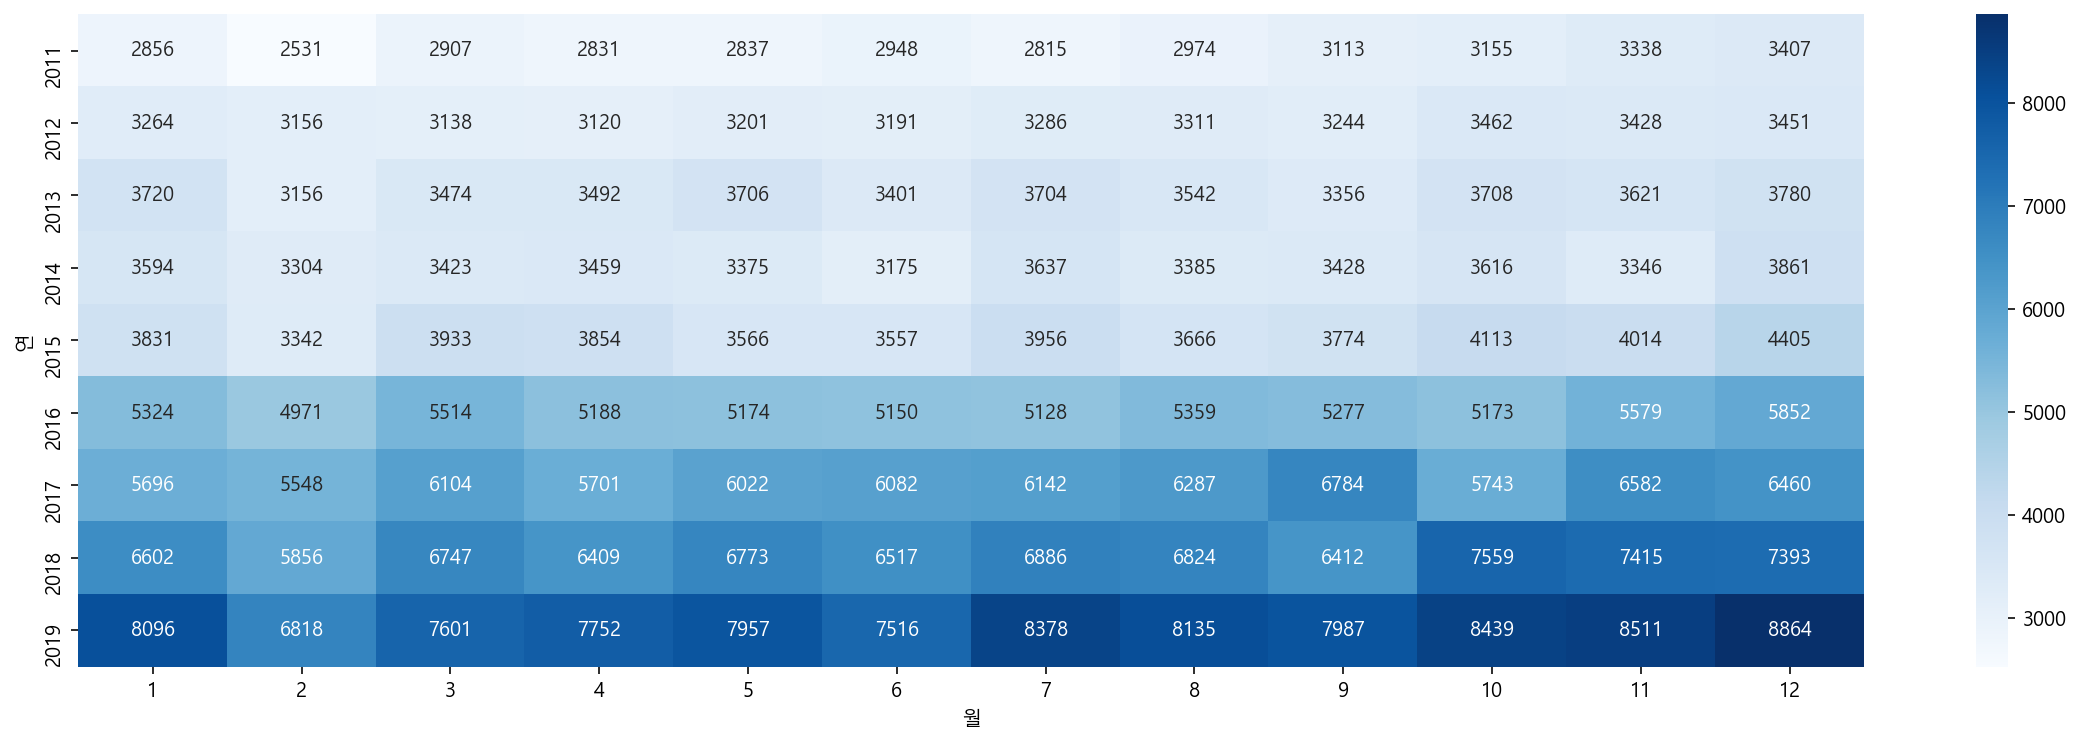

In [123]:
# year_month_count 변수에 담긴 값을 heatmap 으로 그립니다.
# cmap 을 YlGn 으로 표시합니다.
plt.figure(figsize=(20, 6))
sns.heatmap(year_month_count, annot=True, fmt='.0f', cmap='Blues')

## 연, 월별 처방 수와 합계 금액
* 연, 월별 처방 수와 합계금액을 groupby 로 구해보세요.

In [124]:
# 연, 월별 처방 수와 합계금액을 groupby 로 구해보세요.
# 위에서 구한 값은 index와 columns에 연 또는 월이 들어갑니다.
# 같은 값을 갖는 데이터를 index 에 연, 월이 모두 들어가도록 groupby 로 연산을 해봅니다.
# index에 연, 월이 모두 들어갈 때 위의 형태의 데이터프레임과 다루는 차이를 알아봅니다.
# 금액 값에 대해 처방수와 금액의 합계를 구합니다.
df_group_year = df.groupby(["연", "월"])["금액"].agg(["count", "sum"])
df_group_year

count        sum
연    월                   
2011 1    2856   55591612
     2    2531   48600094
     3    2907   55594862
     4    2831   55204896
     5    2837   54215059
...        ...        ...
2019 8    8135  167029028
     9    7987  162821413
     10   8439  175249980
     11   8511  174587113
     12   8864  187307720

[108 rows x 2 columns]

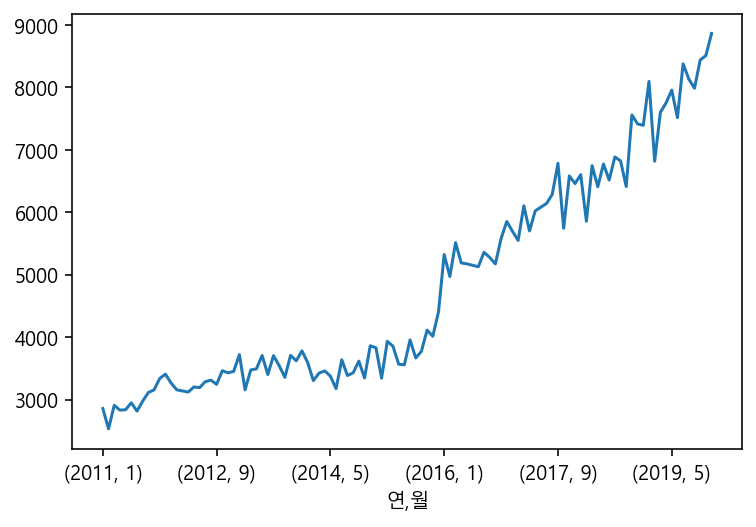

In [125]:
df_group_year["count"].plot()

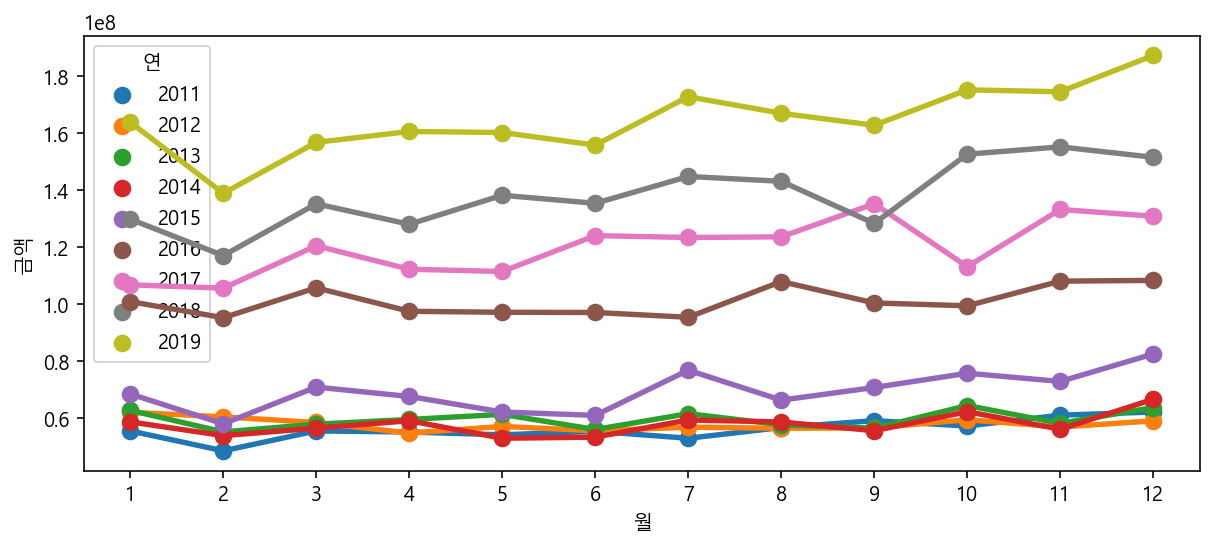

In [127]:
# 월별 처방금액 합계 pointplot 으로 그리기
# x="월", y="금액", hue="연", estimator=np.sum
plt.figure(figsize=(10, 4))
sns.pointplot(data=df, x="월", y="금액", hue="연", estimator=np.sum, ci=None)

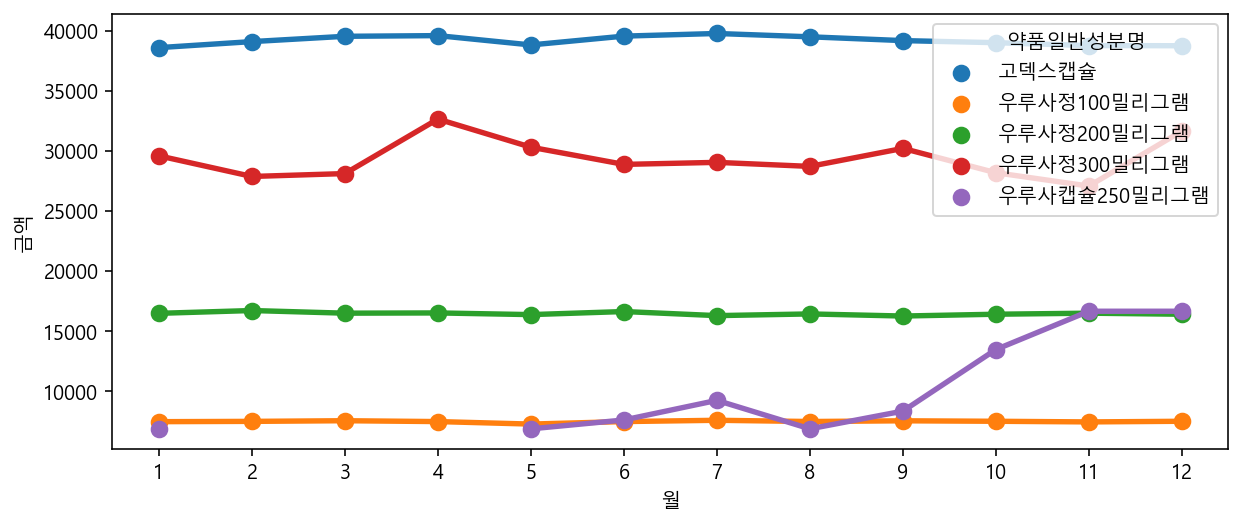

In [129]:
# "약품일반성분명"에 따라 평균 처방 금액 보기
#  x="월", y="금액", hue="약품일반성분명"
plt.figure(figsize=(10, 4))
sns.pointplot(data=df, x="월", y="금액", hue="약품일반성분명", estimator=np.mean, ci=None)

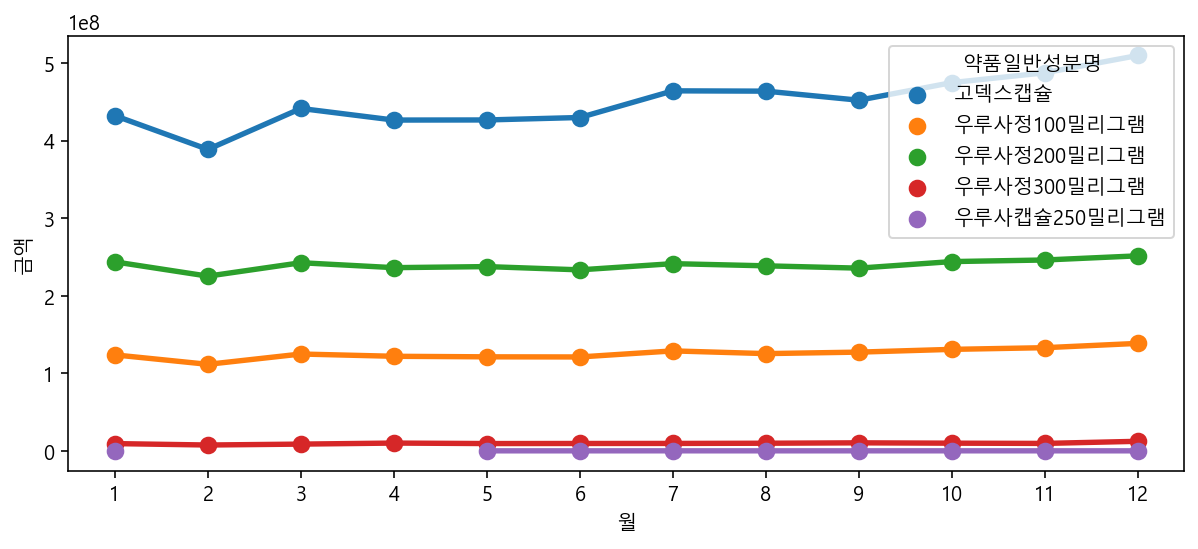

In [130]:
# 월별 "약품일반성분명"에 따른 처방금액 합계
# x="월", y="금액", hue="약품일반성분명", estimator=np.sum
plt.figure(figsize=(10, 4))
sns.pointplot(data=df, x="월", y="금액", hue="약품일반성분명", estimator=np.sum, ci=None)

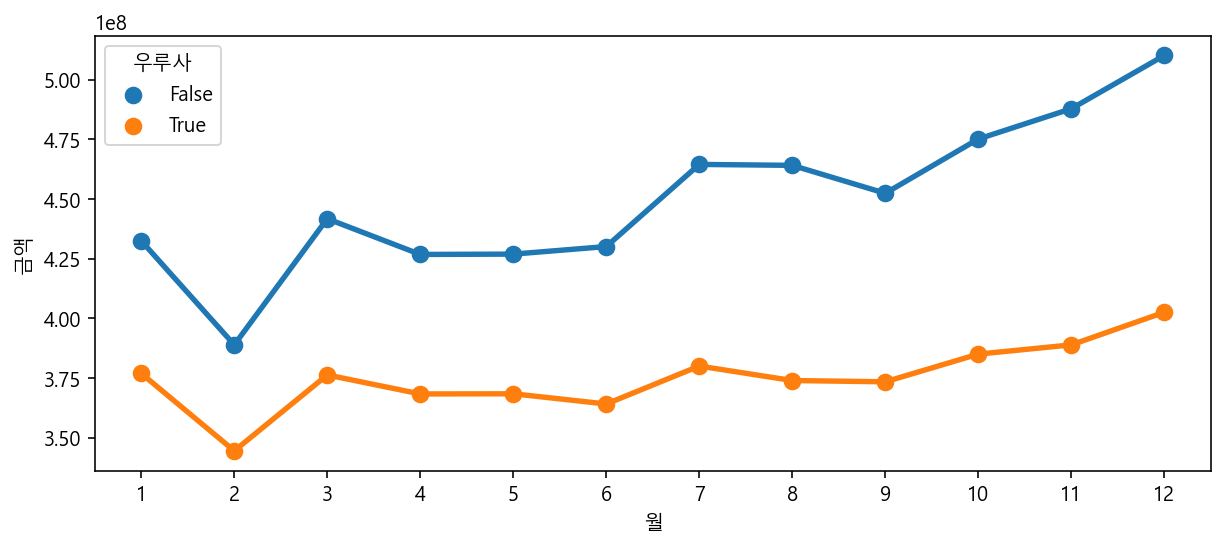

In [131]:
# 월별 "우루사" 여부에 따른 처방금액 합계
# x="월", y="금액", hue="우루사", estimator=np.sum
plt.figure(figsize=(10, 4))
sns.pointplot(data=df, x="월", y="금액", hue="우루사", estimator=np.sum, ci=None)

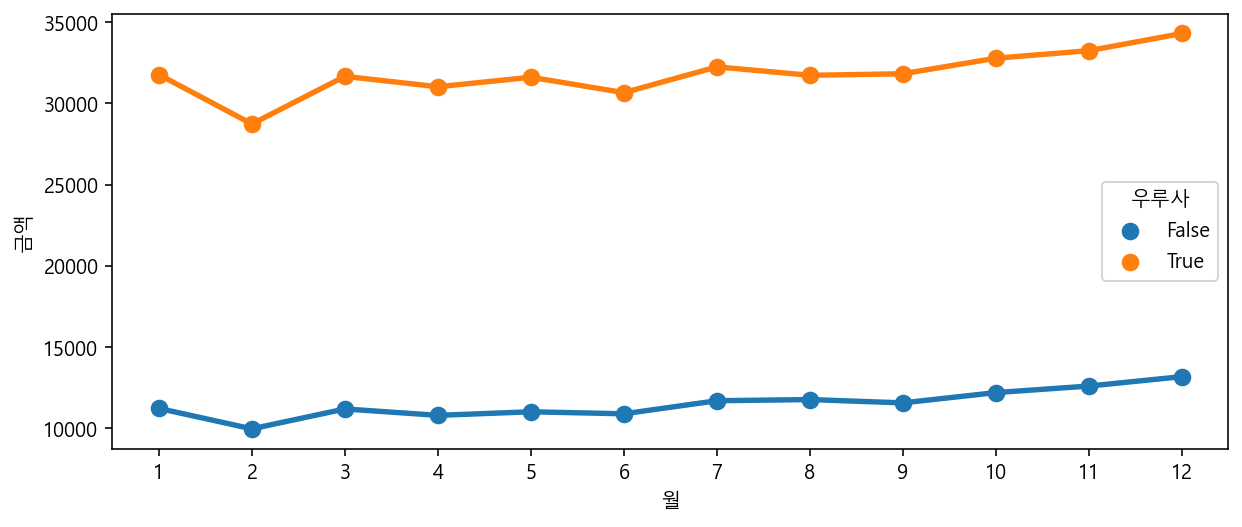

In [132]:
# 월별 처방수
# x="월", y="금액", hue="우루사", estimator=len
plt.figure(figsize=(10, 4))
sns.pointplot(data=df, x="월", y="금액", hue="우루사", estimator=len, ci=None)

## 요일별 처방수

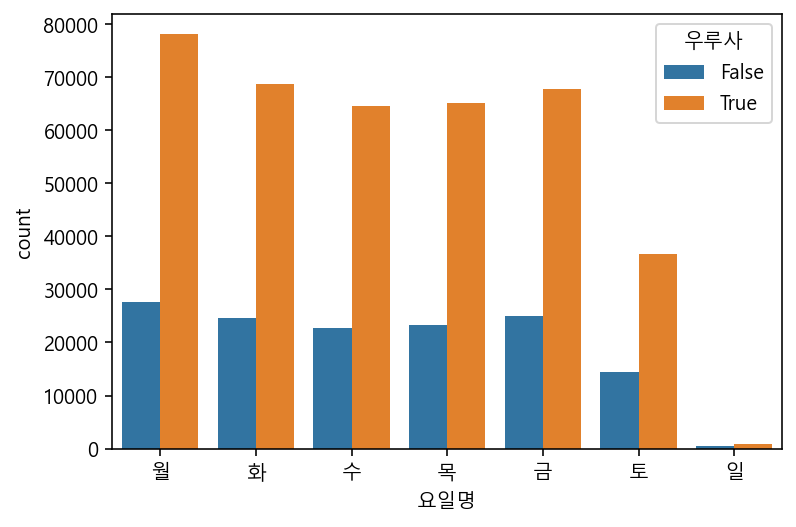

In [133]:
# countplot 을 통해 요일별 우루사 여부에 따른 처방수를 시각화 합니다.
# 이때, data에 df.sort_values("요일") 로 
# df.sort_values("요일"), x="요일명", hue="우루사"
# 요일별로 정렬된 데이터를 넣어주면 요일별로 정렬이 가능합니다.

sns.countplot(data=df.sort_values(by='요일'), x='요일명', hue='우루사')

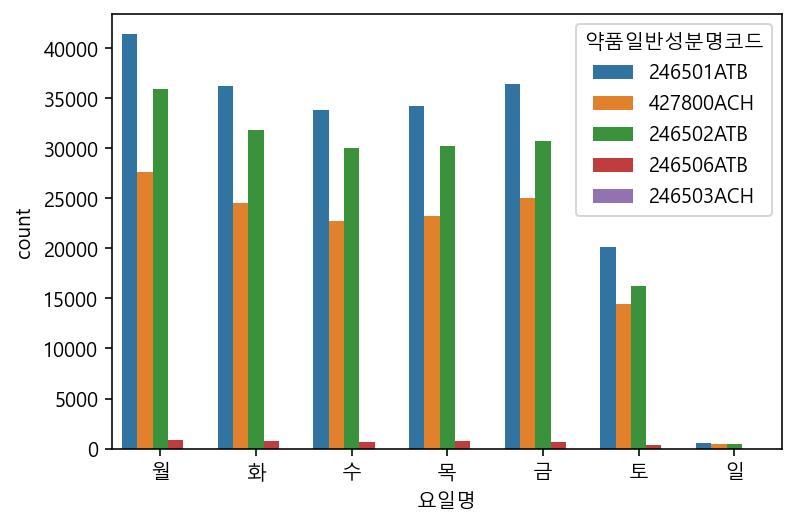

In [134]:
# "약품일반성분명코드" 별로 요일별 처방수를 시각화
sns.countplot(data=df.sort_values(by='요일'), x='요일명', hue='약품일반성분명코드')

### 연령대코드 vs 성별코드

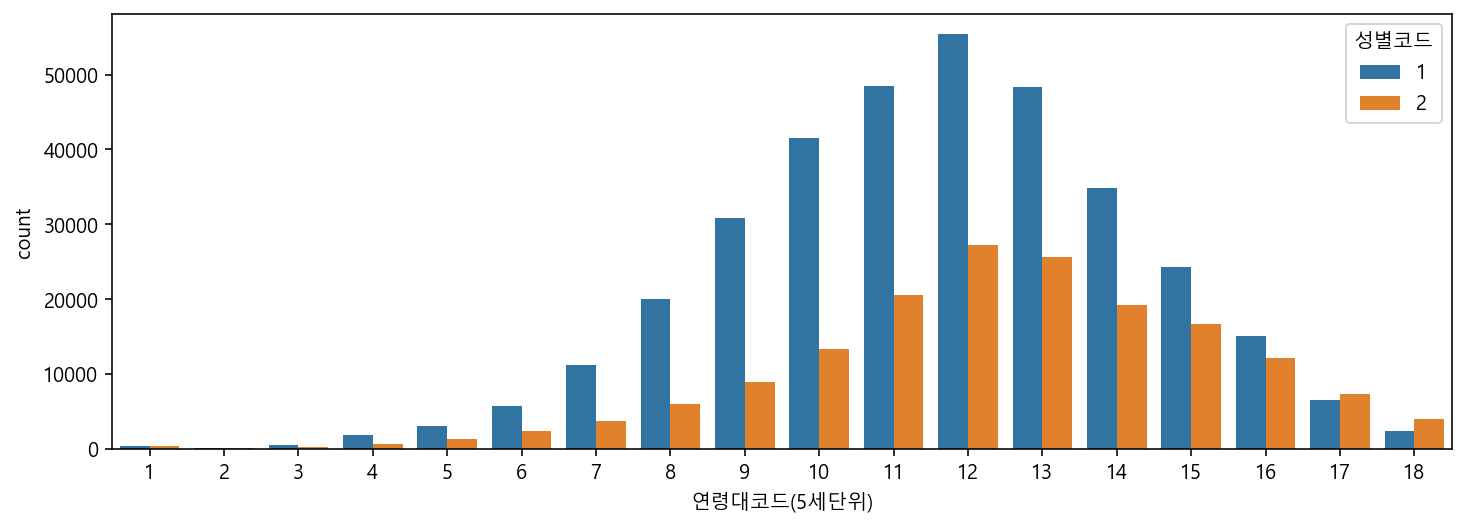

In [137]:
# 연령대코드(5세단위)에 대한 빈도수를  hue="성별코드" 를 사용해서 시각화 합니다.
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='연령대코드(5세단위)', hue='성별코드')

### 월 vs 성별코드

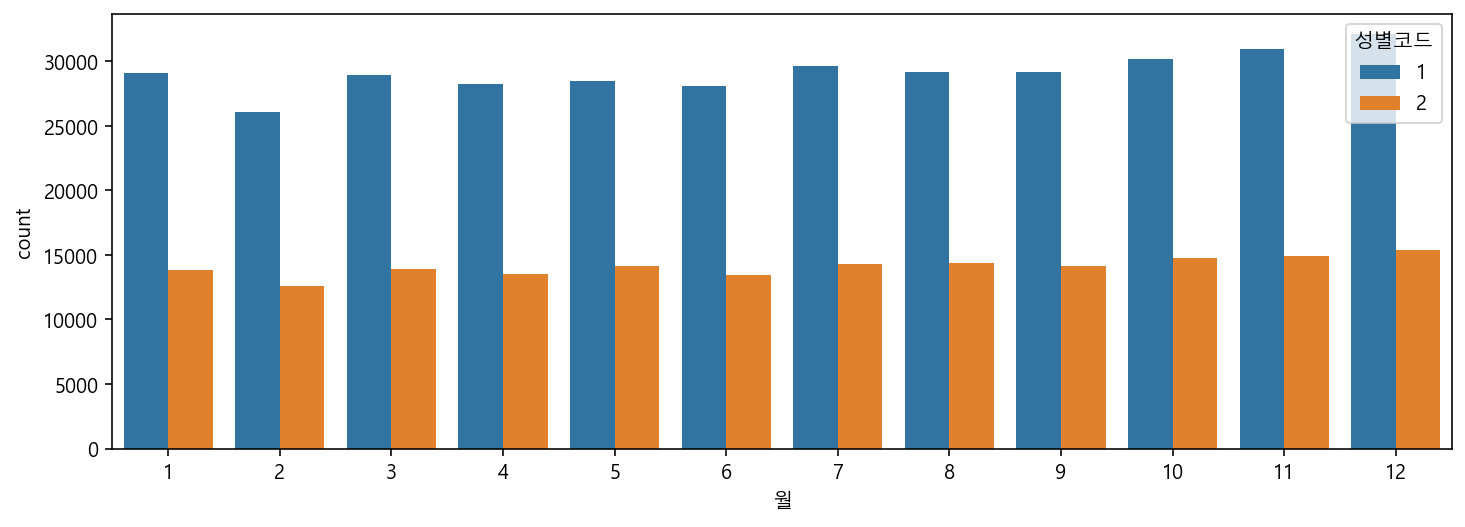

In [138]:
# "월"에 대한 빈도수를  hue="성별코드" 를 사용해서 시각화 합니다.
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='월', hue='성별코드')

## 우루사 vs 고덱스

### 성별코드별 처방수

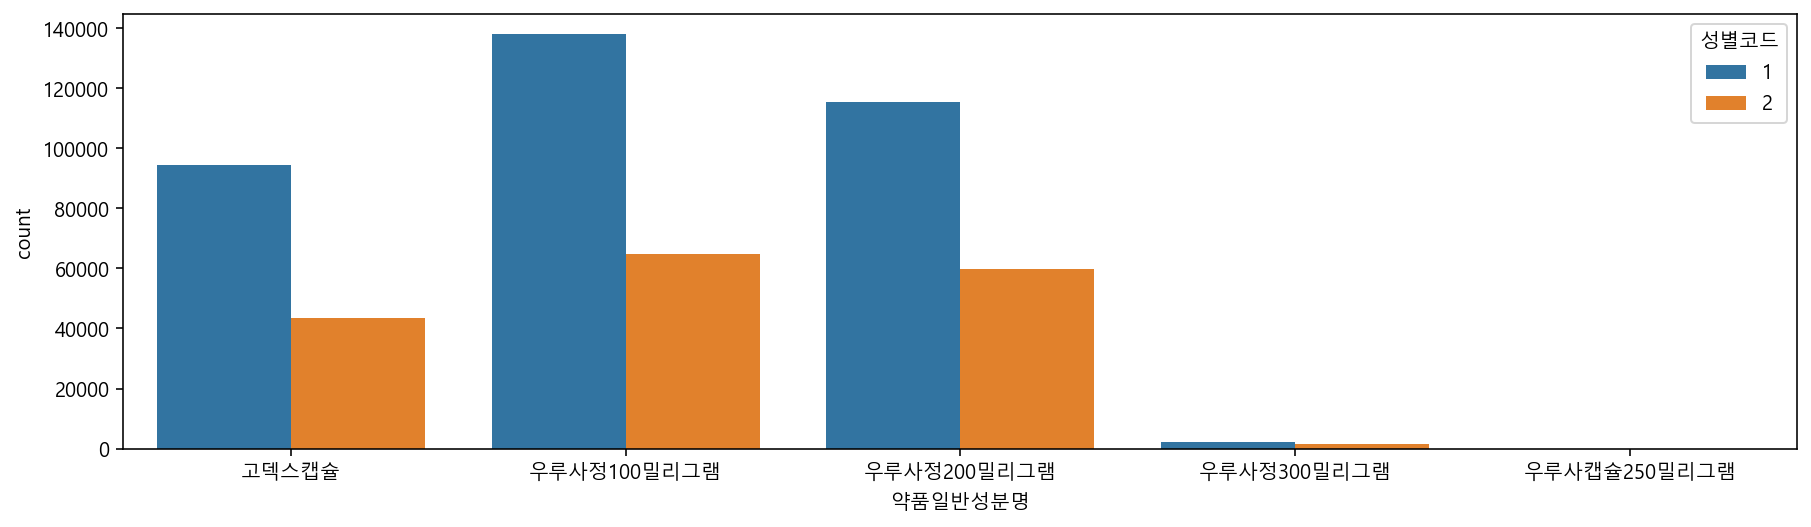

In [139]:
# "약품일반성분명"에 대한 빈도수를  hue="성별코드" 를 사용해서 시각화 합니다.
plt.figure(figsize=(15, 4))

sns.countplot(data=df, x='약품일반성분명', hue='성별코드')

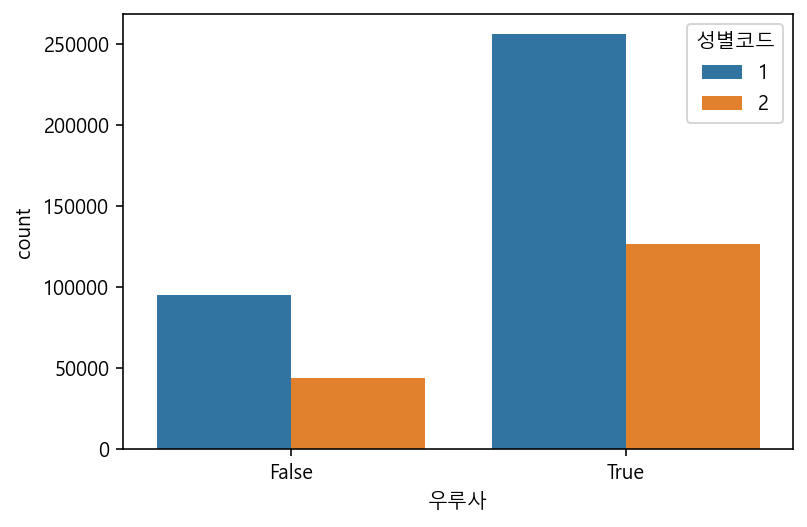

In [140]:
# "우루사"에 대한 빈도수를  hue="성별코드" 를 사용해서 시각화 합니다.
sns.countplot(data=df, x='우루사', hue='성별코드')

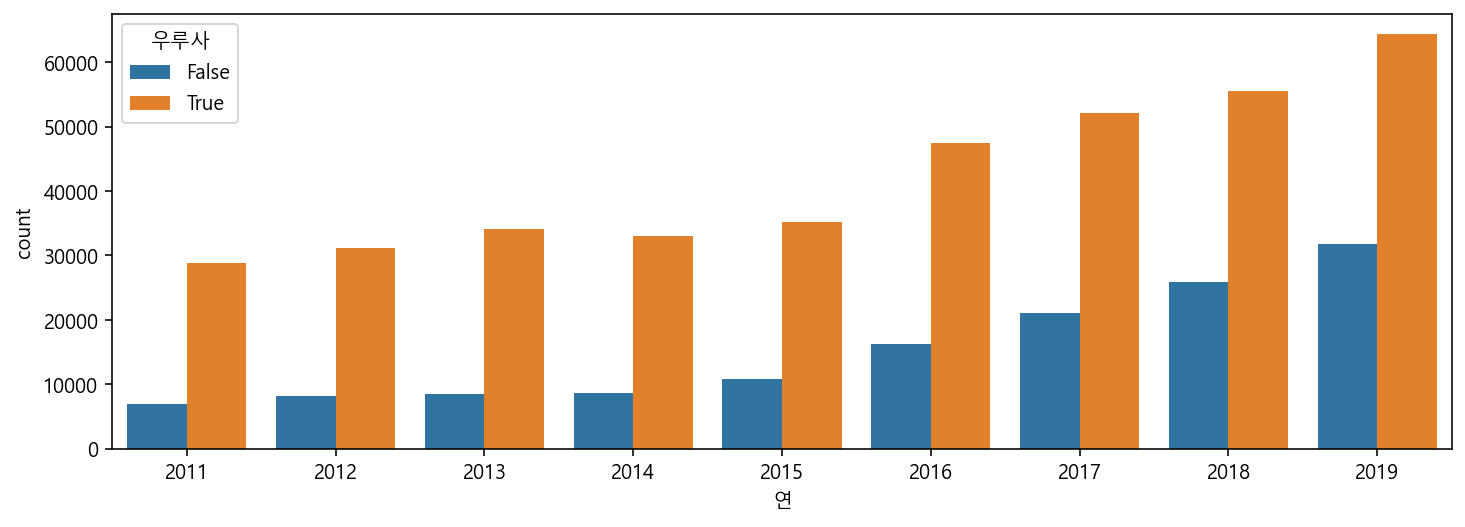

In [143]:
# 연도별 우루사 vs 고덱스 처방 수 
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='연', hue='우루사')

In [ ]:
# 월별 약품일반성분명 에 따른 빈도수


In [ ]:
# 월별 우루사 vs 고덱스 처방 수 


In [ ]:
# 일자별 빈도수를 성별코드에 따라 다른 색상으로 그리기
plt.figure(figsize=(15, 4))


### 기간별 단가와 금액

In [ ]:
# 연도별 평균단가를 "우루사" 여부 에 따라 다른 색상으로 그립니다.


In [ ]:
# 연도별 단가를 "우루사" 여부에 따라 다른 색상으로 그립니다.


In [ ]:
# 연도별 평균금액을 "우루사"에 따라 다른 색상으로 그립니다.


In [ ]:
# 연도별 합계금액을 "우루사"에 따라 다른 색상으로 그립니다.


In [ ]:
# 연도별 "1회 투약량"을 "우루사"여부에 따라 다른 색상으로 그립니다.


### 성별코드별

In [ ]:
# 연도별 평균 총투여일수, hue="성별코드"를 통해 성별코드 별로 다른 색상으로 그리기


In [ ]:
# 연도별 평균 1일투약량, hue="성별코드"를 통해 성별코드 별로 다른 색상으로 그리기


In [ ]:
# 월별 평균 처방 금액을 성별코드에 따라 다른 색상으로 그립니다.


### 연령대코드(5세단위)

In [ ]:
# "연령대코드(5세단위)"별, 평균 총투여일수, hue="우루사"를 통해 우루사 여부 별로 다른 색상으로 그리기


In [ ]:
# "연령대코드(5세단위)"별 평균 금액, hue="우루사"를 통해 우루사 여부 별로 다른 색상으로 그리기


In [ ]:
# 연령대별 평균 1일 투약량, hue="우루사"를 통해 우루사 여부 별로 다른 색상으로 그리기
